In [40]:
import cx_Oracle as oracle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter 
import numpy as np
import math
import seaborn as sns
import scipy.stats as stats  
import scipy
import scipy.cluster.vq
import scipy.spatial.distance
EuclDist = scipy.spatial.distance.euclidean
from mpl_toolkits.mplot3d import Axes3D
from factor_analyzer import FactorAnalyzer
import importlib
from sklearn import metrics,datasets,manifold
import copy
from sklearn import tree
import graphviz
import pydotplus
from six import StringIO
import os
from IPython.display import Image
from pandasql import sqldf

# Commuting Vehicles Travel Features

I will analyse all the commuting vehicle's traveling features, namely 9 features that i got before.

In [41]:
#该函数用来得到oracle中的通勤车的各个features.
db = oracle.connect('')    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('''
                select *
                from COMMUTINGVEHICLE
                ''')    # execute sql 
data = cursor.fetchall()    # fetch data
df_com = pd.DataFrame(data)
#change columns' name
df_com.rename(columns={0:'CAR_NUM'}, inplace = True)

#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")
df_com.head(5)

database connected
database close


,CAR_NUM
0,浙A837YS
1,浙AR911W
2,浙AKB603
3,浙A0PG35
4,浙A739B1


In [42]:
df_all = pd.read_csv("TotalSampleAfterProcessing.csv" , encoding = 'gbk')
df_all.drop(['Unnamed: 0'],axis = 1 , inplace = True)
df_all.head(5)

,CAR_NUM,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
0,浙AR911W,0.809524,1.000000,0.857143,0.809524,0.666667,0.714286,0.630876,3.113023,6.090909
1,浙AJ183G,0.047619,0.380952,0.095238,0.142857,0.047619,0.047619,-1.105313,0.547723,1.600000
2,浙A916KS,0.285714,1.000000,0.190476,0.142857,0.380952,0.333333,-1.348978,2.097060,3.210526
3,浙A918CJ,0.285714,0.619048,0.142857,0.142857,0.238095,0.142857,-0.232944,5.589105,5.285714
4,浙AKB603,0.333333,0.571429,0.428571,0.380952,0.285714,0.285714,-0.341521,1.788854,3.200000


In [43]:
# get the statistical infomation
df_com2 = pd.merge(df_all , df_com , how = 'inner' , on = ['CAR_NUM'])
df_com2.describe()

,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
count,114439.000000,114439.000000,114439.000000,114439.000000,114439.000000,114439.000000,114439.000000,114439.000000,114439.000000
mean,0.607008,0.862569,0.562411,0.551464,0.490893,0.514921,-0.433605,2.335454,3.875053
std,0.203104,0.128583,0.196030,0.185402,0.194421,0.175037,1.049624,1.744383,2.120599
min,0.047619,0.333333,0.047619,0.047619,0.047619,0.238095,-4.296570,0.000000,0.000000
25%,0.476190,0.809524,0.428571,0.428571,0.333333,0.380952,-1.109816,1.000000,2.400000
50%,0.619048,0.904762,0.571429,0.523810,0.476190,0.523810,-0.347153,2.136976,3.666667
75%,0.761905,0.952381,0.714286,0.666667,0.619048,0.619048,0.508219,3.444803,5.121324
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.920949,11.181818


In [44]:
sql = """ select count(*) from df_com2 where CAR_NUM like '%浙A%'"""
comnum = sqldf(sql, globals())
comnum

,count(*)
0,111945


In [45]:
sql = """ select count(*) from df_com2 where CAR_NUM not like '%浙A%'"""
noncomnum = sqldf(sql, globals())
noncomnum

,count(*)
0,2494


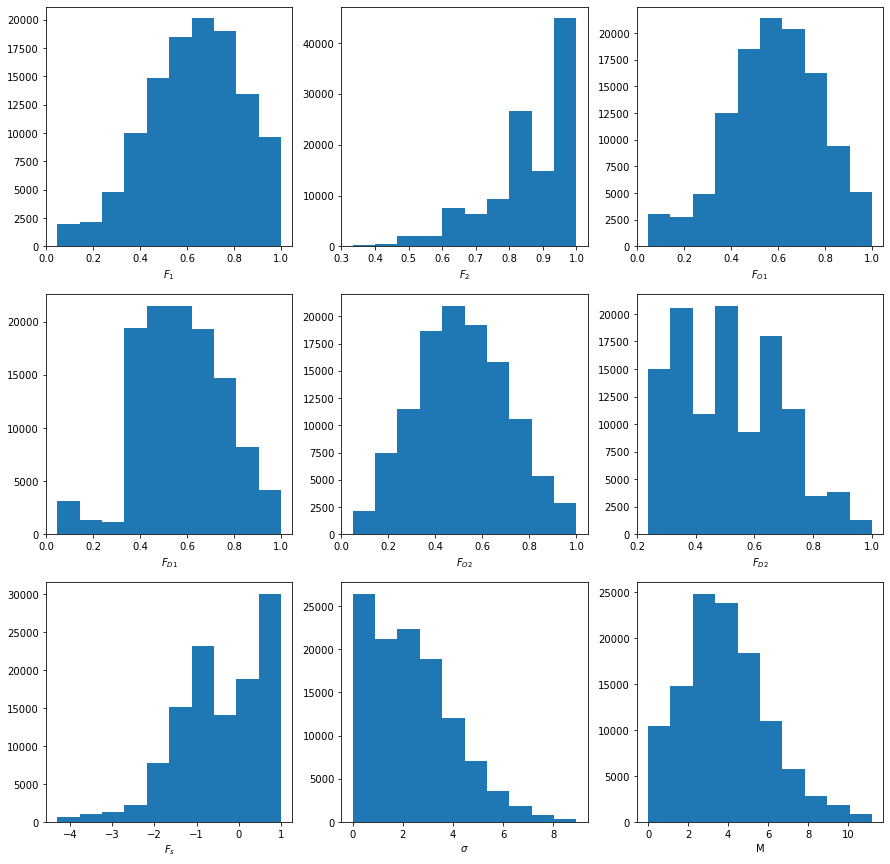

In [46]:
# plot the histogram, so that we can see the distribution of all the features.
fig,((ax1, ax2, ax3), (ax4 ,ax5, ax6), (ax7, ax8 , ax9)) = plt.subplots(3, 3, sharex = False,figsize=(15, 15))
# ax1 = plt.subplot(3, 3, 1,figsize=(10, 11))
ax1.hist(x = df_com2["F1"] , range = None)
ax1.set_xlabel(r'$F_1$')
# # ax2 = plt.subplot(3, 3, 2)
ax2.hist(x = df_com2["F2"] , range = None )
ax2.set_xlabel(r'$F_2$')
ax3.hist(x = df_com2["O1"] , range = None )
ax3.set_xlabel(r'$F_{O1}$')
ax4.hist(x = df_com2["D1"]  , range = None )
ax4.set_xlabel(r'$F_{D1}$')
ax5.hist(x = df_com2["O2"]  , range = None)
ax5.set_xlabel(r'$F_{O2}$')
ax6.hist(x = df_com2["D2"]  , range = None)
ax6.set_xlabel(r'$F_{D2}$')
ax7.hist(x = df_com2["FS"]  , range = None)
ax7.set_xlabel(r'$F_s$')
ax8.hist(x = df_com2["STD_FD"]  , range = None)
ax8.set_xlabel(r'$\sigma$')
ax9.hist(x = df_com2["AVG_FD"]   , range = None)
ax9.set_xlabel('M')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# 所有其他车辆的features的描述性统计情况
得到除了通勤车外的所有其他车辆的描述性统计情况，并将其与通勤车做对比

In [47]:
sql = """select * from df_all where CAR_NUM not in (select CAR_NUM from df_com)"""
df_noncom = sqldf(sql, globals())
df_noncom.head(5)

,CAR_NUM,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
0,浙AJ183G,0.047619,0.380952,0.095238,0.142857,0.047619,0.047619,-1.105313,0.547723,1.600000
1,浙A916KS,0.285714,1.000000,0.190476,0.142857,0.380952,0.333333,-1.348978,2.097060,3.210526
2,浙A918CJ,0.285714,0.619048,0.142857,0.142857,0.238095,0.142857,-0.232944,5.589105,5.285714
3,浙A711B6,0.380952,0.952381,0.238095,0.047619,0.285714,0.142857,-1.236600,3.444198,5.437500
4,浙A3PR53,0.047619,0.333333,0.047619,0.047619,0.047619,0.047619,-1.853595,2.061553,3.750000


In [48]:
df_noncom.describe()

,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
count,347849.000000,347849.000000,347849.000000,347849.000000,347849.000000,347849.000000,347849.000000,347849.000000,347849.000000
mean,0.157896,0.516672,0.158728,0.137048,0.124443,0.132144,-1.145898,2.639541,4.220160
std,0.149599,0.270835,0.157605,0.140965,0.110306,0.110577,1.040528,2.008739,2.391614
min,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,-4.298697,0.000000,0.000000
25%,0.047619,0.285714,0.047619,0.047619,0.047619,0.047619,-1.678605,1.000000,2.500000
50%,0.095238,0.523810,0.095238,0.095238,0.095238,0.095238,-1.098500,2.500000,4.000000
75%,0.190476,0.761905,0.190476,0.142857,0.142857,0.142857,-0.577242,3.954284,5.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.571429,1.000000,8.927486,11.181818


# $\alpha$分别取3%,3.5%,4%时最终识别出的通勤车异同分析,并绘制韦恩图

In [56]:
#该函数用来得到oracle中的通勤车的各个features.
db = oracle.connect('')    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('''
                select *
                from COMMUTINGVEHICLE
                ''')    # execute sql 
data = cursor.fetchall()    # fetch data
df_com = pd.DataFrame(data)
#change columns' name
df_com.rename(columns={0:'CAR_NUM'}, inplace = True)

#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")
df_com.head(5)

database connected
database close


,CAR_NUM
0,浙A837YS
1,浙AR911W
2,浙AKB603
3,浙A0PG35
4,浙A739B1


In [57]:
df_all = pd.read_csv("TotalSampleAfterProcessing.csv" , encoding = 'gbk')
df_all.drop(['Unnamed: 0'],axis = 1 , inplace = True)
df_all.head(5)

,CAR_NUM,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
0,浙AR911W,0.809524,1.000000,0.857143,0.809524,0.666667,0.714286,0.630876,3.113023,6.090909
1,浙AJ183G,0.047619,0.380952,0.095238,0.142857,0.047619,0.047619,-1.105313,0.547723,1.600000
2,浙A916KS,0.285714,1.000000,0.190476,0.142857,0.380952,0.333333,-1.348978,2.097060,3.210526
3,浙A918CJ,0.285714,0.619048,0.142857,0.142857,0.238095,0.142857,-0.232944,5.589105,5.285714
4,浙AKB603,0.333333,0.571429,0.428571,0.380952,0.285714,0.285714,-0.341521,1.788854,3.200000


In [58]:
# get the statistical infomation
df_com = pd.merge(df_all , df_com , how = 'inner' , on = ['CAR_NUM'])
len(df_com)

114439

In [59]:
#该函数用来得到oracle中的通勤车的各个features.
db = oracle.connect('')    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('''
                select *
                from COMMUTINGVEHICLE_3
                ''')    # execute sql 
data = cursor.fetchall()    # fetch data
df_com_3 = pd.DataFrame(data)
#change columns' name
df_com_3.rename(columns={0:'CAR_NUM'}, inplace = True)

#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")
df_com_3.head(5)

database connected
database close


,CAR_NUM
0,浙A789NT
1,浙AN887K
2,浙A082JU
3,浙AN080P
4,浙A5NK25


In [60]:
# get the statistical infomation
df_com_3 = pd.merge(df_all , df_com_3 , how = 'inner' , on = ['CAR_NUM'])
len(df_com_3)

122192

In [61]:
#该函数用来得到oracle中的通勤车的各个features.
db = oracle.connect('')    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('''
                select *
                from COMMUTINGVEHICLE_4
                ''')    # execute sql 
data = cursor.fetchall()    # fetch data
df_com_4 = pd.DataFrame(data)
#change columns' name
df_com_4.rename(columns={0:'CAR_NUM'}, inplace = True)

#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")
df_com_4.head(5)

database connected
database close


,CAR_NUM
0,浙AT1593
1,浙A510K7
2,浙A206T5
3,浙ACR870
4,浙ATC230


In [62]:
# get the statistical infomation
df_com_4 = pd.merge(df_all , df_com_4 , how = 'inner' , on = ['CAR_NUM'])
len(df_com_4)

63116

In [63]:
len(set(df_com['CAR_NUM']) & set(df_com_3['CAR_NUM']))

103929

In [64]:
len(set(df_com_4['CAR_NUM']) & set(df_com_3['CAR_NUM']))

57842

In [65]:
len(set(df_com_4['CAR_NUM']) & set(df_com['CAR_NUM']))

57397

In [66]:
len(set(df_com_4['CAR_NUM']) & set(df_com['CAR_NUM']) & set(df_com_3['CAR_NUM']))

56054

**韦恩图绘制**

In [67]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn3_circles

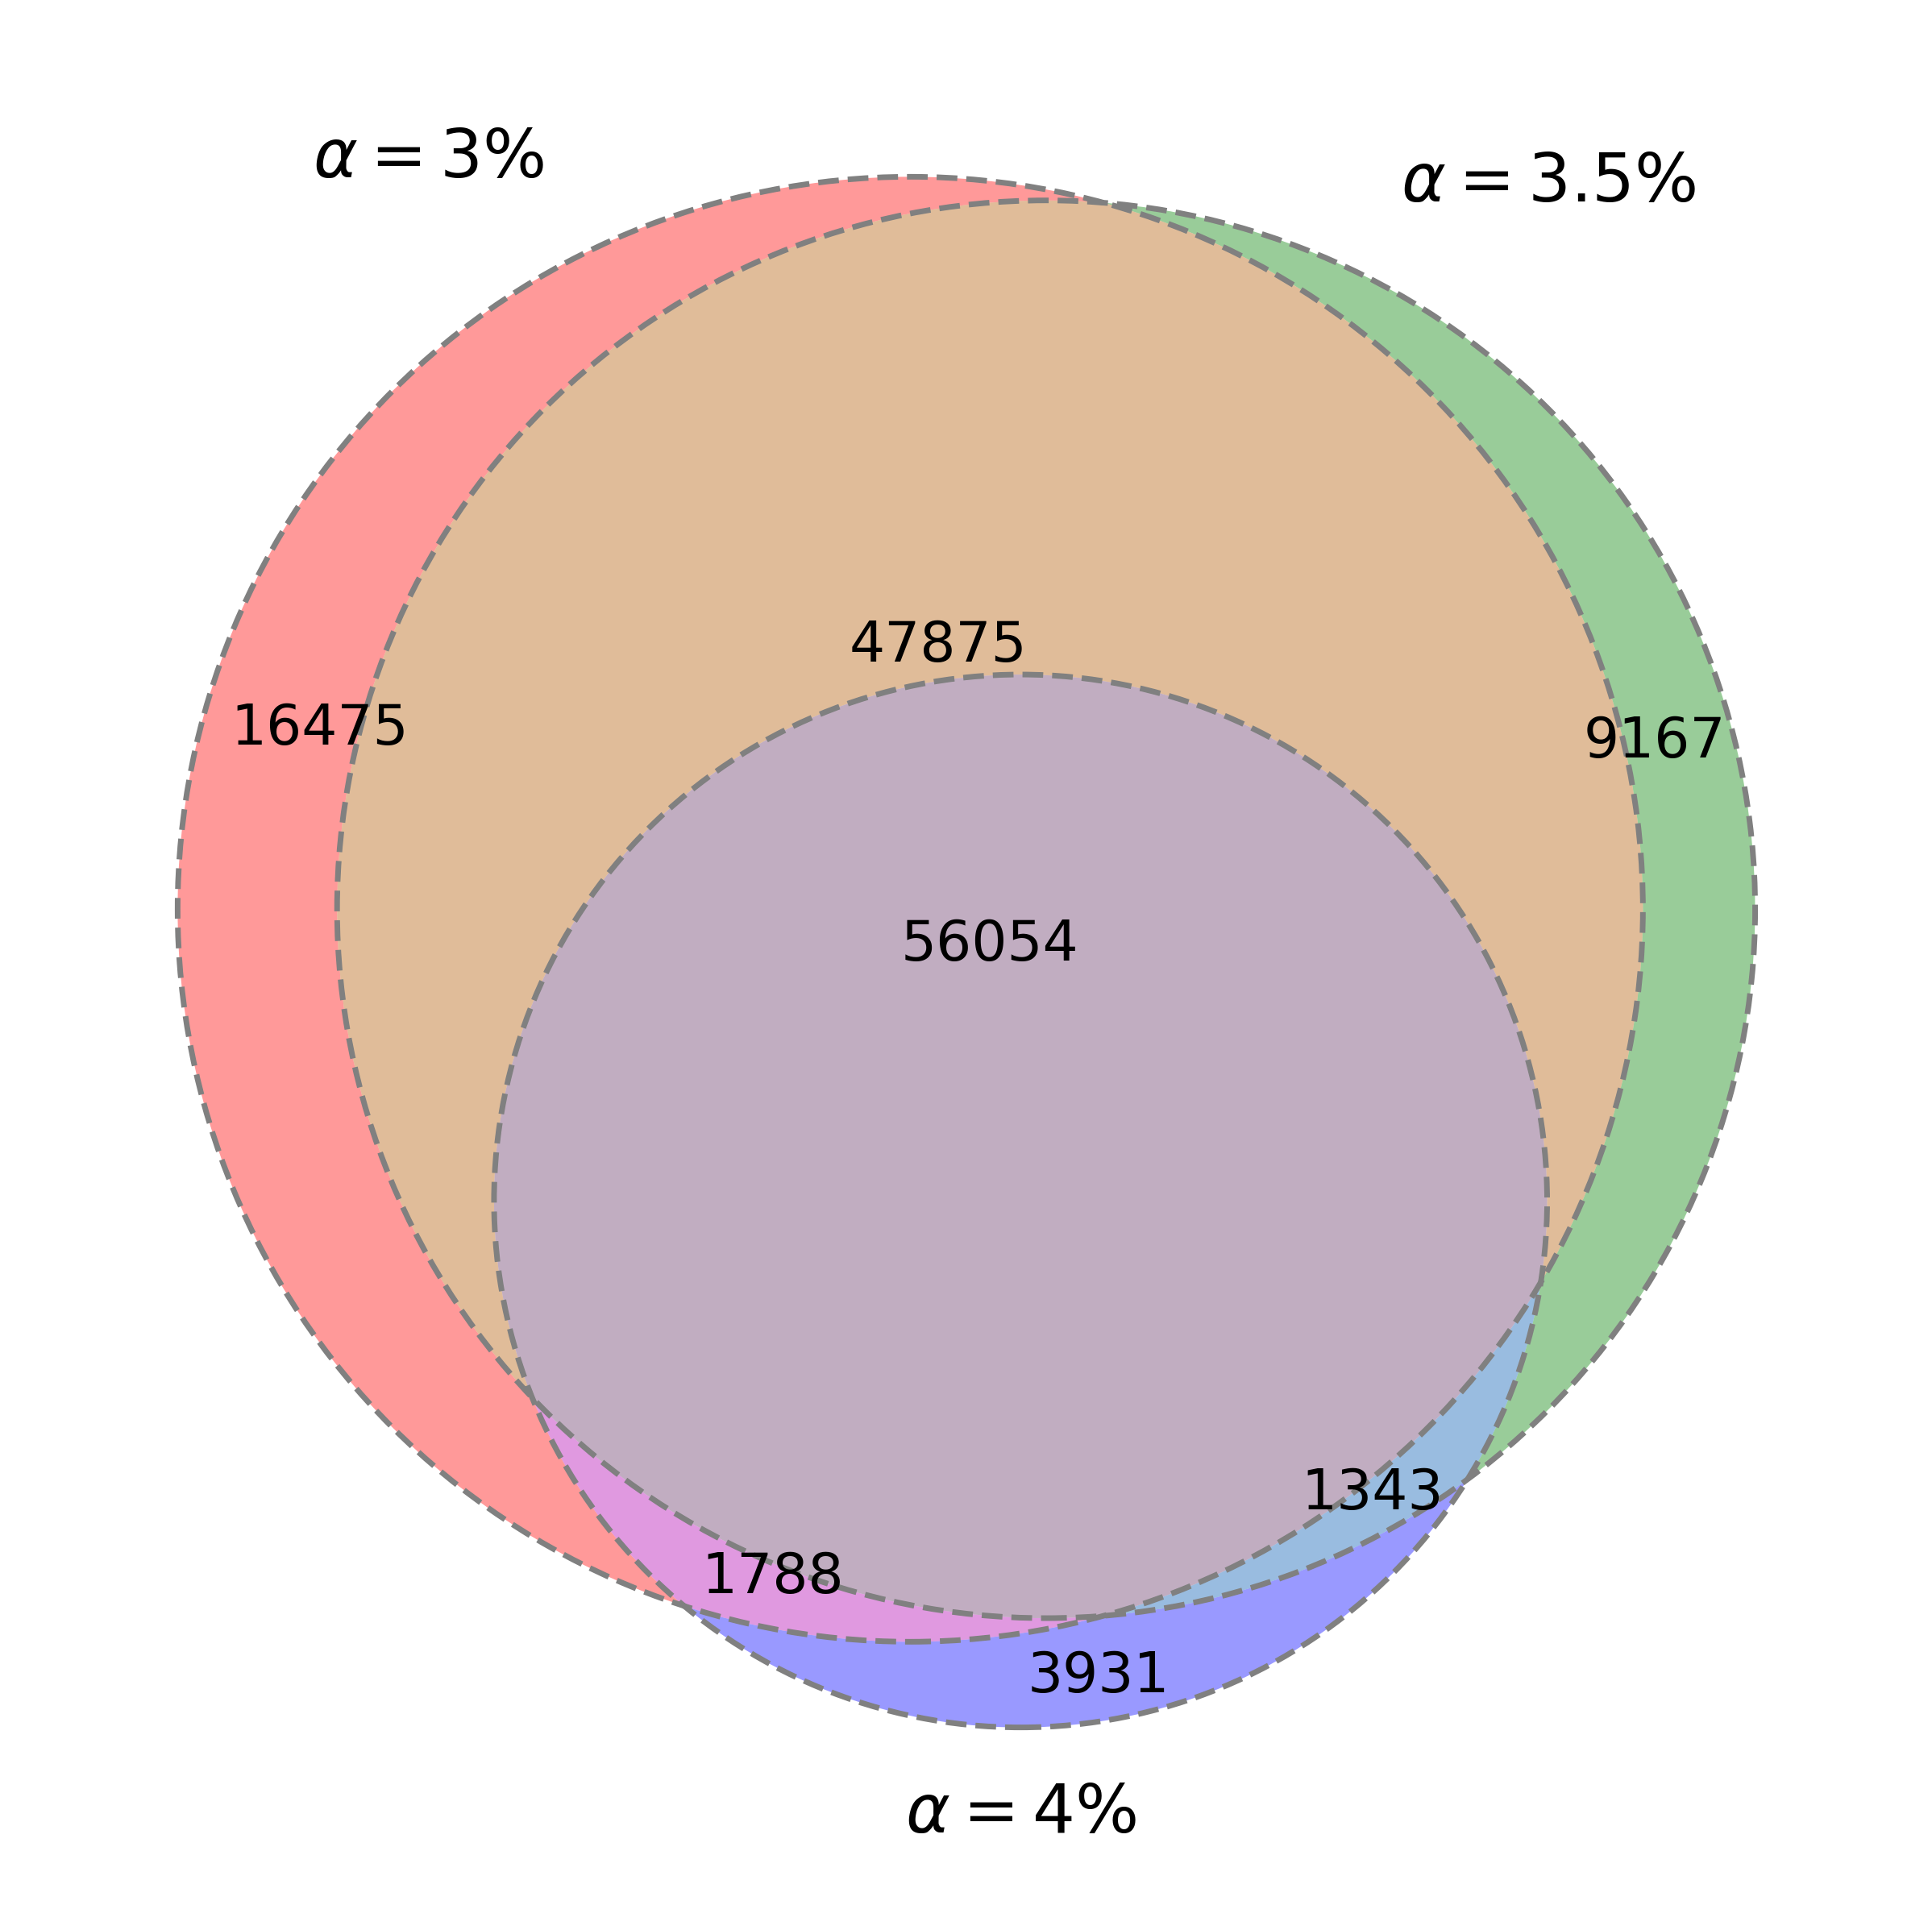

In [69]:
plt.rcParams['figure.dpi'] = 300 #分辨率
my_dpi=500
plt.figure(figsize=(6 , 6), dpi=my_dpi)
v = venn3(subsets = (16475 , 9167 , 47875 , 3931 , 1788 , 1343 , 56054) , 
      set_labels = (r'$\alpha = 3\%$', r'$\alpha = 3.5\%$', r'$\alpha = 4\%$'))

c=venn3_circles(subsets = (16475 , 9167 , 47875 , 3931 , 1788 , 1343 , 56054), linestyle='dashed', linewidth=1, color="grey")
plt.show()